# Homework RNNs
1. Download and explore data
2. Preproceess data if needed
3. Create a dataset with group of inputs of size X = (10-50) - Randomly sample points, and take the next X points
3.a. Either randomly sample different points to get xs and ys
3.b Or Take evert possible datapoint from 0 to size of dataset - x. and shuffle the dataset
4. Make it into a tensorflow dataset, Split the data into train and test
5. Time distributed predictions with size 5-10
6. Use 3 different model architectures (RNN type / wavenet)
7. Prints the different graphs

In [67]:
!wget https://storage.googleapis.com/nicksdemobucket/sunspots.csv

# OR

!wget https://storage.googleapis.com/nicksdemobucket/temperatures.csv

# OR MNIST

--2022-04-18 03:05:52--  https://storage.googleapis.com/nicksdemobucket/sunspots.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 173.194.218.128, 142.250.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45039 (44K) [application/octet-stream]
Saving to: ‘sunspots.csv.3’

sunspots.csv.3      100%[===================>]  43.98K  --.-KB/s    in 0s      

2022-04-18 03:05:52 (114 MB/s) - ‘sunspots.csv.3’ saved [45039/45039]

--2022-04-18 03:05:52--  https://storage.googleapis.com/nicksdemobucket/temperatures.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 173.194.218.128, 142.250.98.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/csv]
Saving to: ‘temperatures.csv.3’

temperatures.csv

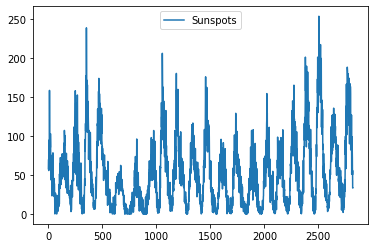

In [68]:
import pandas as pd
import numpy as np

df = pd.read_csv('sunspots.csv')

df.plot()

In [69]:
df.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


# Preprocess

In [70]:
from tensorflow import keras

Create a dataset with group of inputs of size X = (10-50) - Randomly sample points, and take the next X points

a. Either randomly sample different points to get xs and ys

b Or Take evert possible datapoint from 0 to size of dataset - x. and shuffle the dataset

In [71]:
df.shape

(2820, 2)

In [72]:
def slide_window(df,x):
  for s in range(1, x):
    df['{}_month_before'.format(s)] = df['Sunspots'].shift(s)
  return df

In [73]:
df_new = slide_window(df,60) # takes x = 50， predicting next 10
df_new

,Month,Sunspots,1_month_before,2_month_before,3_month_before,4_month_before,5_month_before,6_month_before,7_month_before,8_month_before,...,50_month_before,51_month_before,52_month_before,53_month_before,54_month_before,55_month_before,56_month_before,57_month_before,58_month_before,59_month_before
0,1749-01,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1749-02,62.6,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1749-03,70.0,62.6,58.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1749-04,55.7,70.0,62.6,58.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1749-05,85.0,55.7,70.0,62.6,58.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815,1983-08,71.8,82.2,91.1,99.2,80.7,66.5,51.0,84.3,127.0,...,149.5,134.4,101.5,138.0,137.5,166.6,122.7,97.9,125.1,138.2
2816,1983-09,50.3,71.8,82.2,91.1,99.2,80.7,66.5,51.0,84.3,...,159.4,149.5,134.4,101.5,138.0,137.5,166.6,122.7,97.9,125.1
2817,1983-10,55.8,50.3,71.8,82.2,91.1,99.2,80.7,66.5,51.0,...,142.2,159.4,149.5,134.4,101.5,138.0,137.5,166.6,122.7,97.9
2818,1983-11,33.3,55.8,50.3,71.8,82.2,91.1,99.2,80.7,66.5,...,188.4,142.2,159.4,149.5,134.4,101.5,138.0,137.5,166.6,122.7


In [74]:
df_final = df_new.dropna()
df_final.head()

,Month,Sunspots,1_month_before,2_month_before,3_month_before,4_month_before,5_month_before,6_month_before,7_month_before,8_month_before,...,50_month_before,51_month_before,52_month_before,53_month_before,54_month_before,55_month_before,56_month_before,57_month_before,58_month_before,59_month_before
59,1753-12,6.7,20.0,25.0,28.0,39.0,22.2,31.7,36.0,38.0,...,75.5,75.9,66.3,94.8,83.5,85.0,55.7,70.0,62.6,58.0
60,1754-01,0.0,6.7,20.0,25.0,28.0,39.0,22.2,31.7,36.0,...,158.6,75.5,75.9,66.3,94.8,83.5,85.0,55.7,70.0,62.6
61,1754-02,3.0,0.0,6.7,20.0,25.0,28.0,39.0,22.2,31.7,...,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0,55.7,70.0
62,1754-03,1.7,3.0,0.0,6.7,20.0,25.0,28.0,39.0,22.2,...,73.3,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0,55.7
63,1754-04,13.7,1.7,3.0,0.0,6.7,20.0,25.0,28.0,39.0,...,75.9,73.3,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0


In [75]:
df_final=df_final.drop('Month',1)
df_final.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Sunspots,1_month_before,2_month_before,3_month_before,4_month_before,5_month_before,6_month_before,7_month_before,8_month_before,9_month_before,...,50_month_before,51_month_before,52_month_before,53_month_before,54_month_before,55_month_before,56_month_before,57_month_before,58_month_before,59_month_before
59,6.7,20.0,25.0,28.0,39.0,22.2,31.7,36.0,38.0,45.7,...,75.5,75.9,66.3,94.8,83.5,85.0,55.7,70.0,62.6,58.0
60,0.0,6.7,20.0,25.0,28.0,39.0,22.2,31.7,36.0,38.0,...,158.6,75.5,75.9,66.3,94.8,83.5,85.0,55.7,70.0,62.6
61,3.0,0.0,6.7,20.0,25.0,28.0,39.0,22.2,31.7,36.0,...,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0,55.7,70.0
62,1.7,3.0,0.0,6.7,20.0,25.0,28.0,39.0,22.2,31.7,...,73.3,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0,55.7
63,13.7,1.7,3.0,0.0,6.7,20.0,25.0,28.0,39.0,22.2,...,75.9,73.3,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0


In [76]:
from sklearn.utils import shuffle
df_final_shuffle = shuffle(df_final)
df_final_shuffle.reset_index(inplace=True, drop=True)

Make it into a tensorflow dataset, Split the data into train and test

In [77]:
df_final_shuffle.head()

,Sunspots,1_month_before,2_month_before,3_month_before,4_month_before,5_month_before,6_month_before,7_month_before,8_month_before,9_month_before,...,50_month_before,51_month_before,52_month_before,53_month_before,54_month_before,55_month_before,56_month_before,57_month_before,58_month_before,59_month_before
0,10.3,16.3,7.6,2.3,0.9,1.4,2.8,0.0,12.4,0.0,...,34.8,31.4,9.0,22.3,25.8,14.5,38.3,36.4,30.2,33.3
1,31.7,28.9,11.3,4.9,20.8,23.1,7.6,9.2,7.0,1.5,...,92.9,59.9,59.9,59.9,54.1,54.8,61.4,51.3,85.2,91.0
2,90.3,105.4,89.0,80.3,110.0,103.0,91.7,145.5,162.4,143.2,...,13.5,9.8,4.9,5.0,1.5,2.9,5.1,9.2,0.7,0.0
3,48.1,21.8,27.6,11.3,20.0,31.0,29.1,29.4,40.6,42.6,...,88.8,88.2,84.7,88.1,65.7,73.0,75.0,78.6,65.4,70.5
4,2.9,5.1,9.2,0.7,0.0,1.5,9.0,14.1,7.3,12.7,...,66.4,56.7,48.3,40.9,50.6,42.0,66.6,62.5,73.4,84.0


In [78]:
series_set = np.array(df_final_shuffle)[...,np.newaxis]
series_set.shape

(2761, 60, 1)

In [79]:
#train an RNN to predict all 10 next values at once
n_steps = 50
fc = 10
X_train = series_set[:2000,:n_steps]
X_valid = series_set[2000:2400,:n_steps]
X_test = series_set[2400:, :n_steps]

Y=np.empty((len(series_set),n_steps,fc))
for step_ahead in range(1,fc+1):
    Y[..., step_ahead-1]=series_set[...,step_ahead:step_ahead+n_steps,0]

y_train = Y[:2000]
y_valid = Y[2000:2400]
y_test = Y[2400:]

In [80]:
import tensorflow as tf

batch_size = 32

train_set = tf.data.Dataset.from_tensor_slices((X_train,y_train))
valid_set = tf.data.Dataset.from_tensor_slices((X_valid,y_valid))
test_set = tf.data.Dataset.from_tensor_slices((X_test,y_test))

train_set = train_set.shuffle(10000)
train_set=train_set.batch(batch_size).prefetch(1)
valid_set=valid_set.batch(batch_size).prefetch(1)
test_set=test_set.batch(batch_size).prefetch(1)

# RNN SEQ TO SEQ

In [82]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=0.01))

history = model.fit(train_set, epochs=20, # 20
                   validation_data=valid_set)

Epoch 1/20
63/63 [==============================] - 5s 28ms/step - loss: 3704.3035 - val_loss: 3579.4075
Epoch 2/20
63/63 [==============================] - 1s 19ms/step - loss: 2802.1003 - val_loss: 2783.1760
Epoch 3/20
63/63 [==============================] - 1s 19ms/step - loss: 2171.1106 - val_loss: 2209.5100
Epoch 4/20
63/63 [==============================] - 1s 19ms/step - loss: 1740.0450 - val_loss: 1825.3785
Epoch 5/20
63/63 [==============================] - 2s 37ms/step - loss: 1447.7646 - val_loss: 1539.3365
Epoch 6/20
63/63 [==============================] - 2s 38ms/step - loss: 1236.2163 - val_loss: 1335.6595
Epoch 7/20
63/63 [==============================] - 1s 19ms/step - loss: 1088.9886 - val_loss: 1192.6182
Epoch 8/20
63/63 [==============================] - 1s 19ms/step - loss: 973.7147 - val_loss: 1080.0709
Epoch 9/20
63/63 [==============================] - 1s 20ms/step - loss: 888.7844 - val_loss: 988.1797
Epoch 10/20
63/63 [==============================] - 1s 19

In [97]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, None, 20)          440       
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, None, 20)          820       
                                                                 
 time_distributed_4 (TimeDis  (None, None, 10)         210       
 tributed)                                                       
                                                                 
Total params: 1,470
Trainable params: 1,470
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.evaluate(test_set)

12/12 [==============================] - 0s 6ms/step - loss: 547.4921


547.4920654296875

In [98]:
X_new, Y_new = series_set[:, :50, :], series_set[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

In [99]:
print(Y_pred.shape)
print(Y_new.shape)
print(X_new.shape)

(2761, 10, 1)
(2761, 10, 1)
(2761, 50, 1)


In [120]:
import matplotlib.pyplot as plt

def plot_series(x, y, color='r'):
  plt.plot(x.reshape(-1), 'o-')
  plt.scatter(51, y, c=color)
  plt.grid(True)

def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0], 50)
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -25, 70])
    plt.legend(fontsize=14)

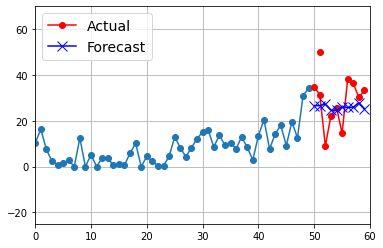

In [121]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)

# LSTMs

In [110]:
model1 = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model1.compile(loss="mse", optimizer="adam")
history1 = model1.fit(train_set, epochs=20, # 20
                   validation_data=valid_set)

Epoch 1/20
63/63 [==============================] - 10s 61ms/step - loss: 4261.9614 - val_loss: 4643.6108
Epoch 2/20
63/63 [==============================] - 3s 46ms/step - loss: 4053.8462 - val_loss: 4432.3643
Epoch 3/20
63/63 [==============================] - 3s 49ms/step - loss: 3885.0464 - val_loss: 4273.9917
Epoch 4/20
63/63 [==============================] - 5s 76ms/step - loss: 3748.8030 - val_loss: 4136.3096
Epoch 5/20
63/63 [==============================] - 4s 60ms/step - loss: 3627.0127 - val_loss: 4012.3831
Epoch 6/20
63/63 [==============================] - 4s 65ms/step - loss: 3515.0242 - val_loss: 3895.1130
Epoch 7/20
63/63 [==============================] - 4s 64ms/step - loss: 3409.7507 - val_loss: 3783.9565
Epoch 8/20
63/63 [==============================] - 4s 71ms/step - loss: 3309.0596 - val_loss: 3677.7039
Epoch 9/20
63/63 [==============================] - 5s 71ms/step - loss: 3213.0217 - val_loss: 3575.8291
Epoch 10/20
63/63 [==============================] - 4

In [111]:
model1.evaluate(test_set)

12/12 [==============================] - 0s 13ms/step - loss: 2384.9146


2384.91455078125

In [112]:
X_new1, Y_new1 = series_set[:, :50, :], series_set[:, 50:, :]
Y_pred1 = model1.predict(X_new1)[:, -1][..., np.newaxis]

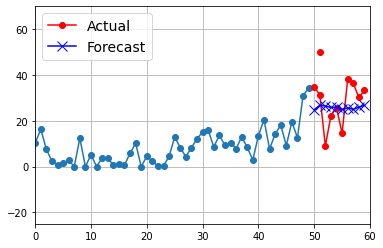

In [122]:
plot_multiple_forecasts(X_new1, Y_new1, Y_pred1)

# GRUs

In [114]:
model2 = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model2.compile(loss="mse", optimizer="adam")
history2 = model2.fit(train_set, epochs=20, # 20
                   validation_data=valid_set)

Epoch 1/20
63/63 [==============================] - 12s 86ms/step - loss: 4209.2393 - val_loss: 4581.2852
Epoch 2/20
63/63 [==============================] - 3s 45ms/step - loss: 4019.4167 - val_loss: 4413.2593
Epoch 3/20
63/63 [==============================] - 3s 44ms/step - loss: 3877.4482 - val_loss: 4271.7432
Epoch 4/20
63/63 [==============================] - 3s 45ms/step - loss: 3751.6404 - val_loss: 4143.4121
Epoch 5/20
63/63 [==============================] - 3s 46ms/step - loss: 3635.1960 - val_loss: 4021.2419
Epoch 6/20
63/63 [==============================] - 3s 46ms/step - loss: 3525.5874 - val_loss: 3907.3594
Epoch 7/20
63/63 [==============================] - 3s 45ms/step - loss: 3421.8206 - val_loss: 3797.9863
Epoch 8/20
63/63 [==============================] - 3s 45ms/step - loss: 3322.9321 - val_loss: 3693.1443
Epoch 9/20
63/63 [==============================] - 3s 45ms/step - loss: 3228.3750 - val_loss: 3592.1990
Epoch 10/20
63/63 [==============================] - 3

In [115]:
model2.evaluate(test_set)

12/12 [==============================] - 0s 9ms/step - loss: 2400.6777


2400.677734375

In [116]:
X_new2, Y_new2 = series_set[:, :50, :], series_set[:, 50:, :]
Y_pred2 = model2.predict(X_new2)[:, -1][..., np.newaxis]

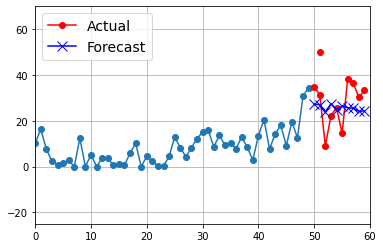

In [123]:
plot_multiple_forecasts(X_new2, Y_new2, Y_pred2)